In [2]:
from netCDF4 import Dataset
import cartopy
import xarray
#import geoviews
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcol
import matplotlib.cm as cm
import matplotlib.ticker as mticker
import os
import nctoolkit as nct
import regex
from matplotlib.ticker import FormatStrFormatter
from cartopy.util import add_cyclic_point
from matplotlib import colors
import geopandas as gpd
import shapely.geometry as shp
#from osgeo import gdal,osr,ogr
import rioxarray
import pyproj
import pandas as pd
import xesmf as xe

nctoolkit is using Climate Data Operators version 1.9.8


In [3]:
nct.deep_clean()

In [4]:
os.chdir('/media/jasmine/Album/Project')
print(os.getcwd())

/media/jasmine/Album/Project


In [5]:
# Load multiple files at once and getting variable names

files = ["Data/Raw/siconc_SImon_CESM2_historical_r1i1p1f1_gn_185001-201412.nc"]

names = ', '.join(files)
print(names)

variable = regex.search(r"(?<=Data/Raw/)[^_]*", names).group()
print(variable)
model = regex.search(r"(?<=Data/Raw/.*?_.*?_)[^_]*", names).group()
print(model)
experiment = regex.search(r"(?<=Data/Raw/.*?_.*?_.*?_)[^_]*", names).group()
print(experiment)

start = 2015
end = 2100

Data/Raw/siconc_SImon_CESM2_historical_r1i1p1f1_gn_185001-201412.nc
siconc
CESM2
historical


/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/xarray/conventions.py:516: SerializationWarning: variable 'siconc' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.


<xarray.Dataset>
Dimensions:    (time: 1980, nj: 384, ni: 320, d2: 2, nvertices: 4)
Coordinates:
    lat        (nj, ni) float64 ...
    lon        (nj, ni) float64 ...
  * ni         (ni) int32 1 2 3 4 5 6 7 8 9 ... 313 314 315 316 317 318 319 320
  * nj         (nj) int32 1 2 3 4 5 6 7 8 9 ... 377 378 379 380 381 382 383 384
  * time       (time) object 1850-01-15 12:00:00 ... 2014-12-15 12:00:00
Dimensions without coordinates: d2, nvertices
Data variables:
    siconc     (time, nj, ni) float32 ...
    time_bnds  (time, d2) object ...
    lat_bnds   (nj, ni, nvertices) float32 ...
    lon_bnds   (nj, ni, nvertices) float32 ...
Attributes: (12/45)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    case_id:                15
    cesm_casename:          b.e21.BHIST.f09_g17.CMIP6-historical.001
    contact:                cesm_cmip6@ucar.edu
    creation_date:          2019-01-17T00:39:18Z
    ...                     ...
    sub_experiment:         none
    sub_experiment_id:      none
    branch_time_in_parent:  219000.0
    branch_time_in_child:   674885.0
    branch_method:          standard
    further_info_url:       https://furtherinfo.es-doc.org/CMIP6.NCAR.CESM2.h...

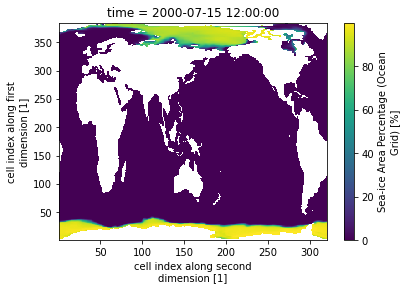

In [45]:
nc = xarray.open_dataset("Data/Raw/siconc_SImon_CESM2_historical_r1i1p1f1_gn_185001-201412.nc")
plotting = nc.sel(time = "2000-07")
plotting[variable].plot()
nc

### Remapping and making sure longitude lines up at the end

In [31]:
!cdo remapbil,r360x180 Data/Raw/siconc_SImon_CESM2_historical_r1i1p1f1_gn_185001-201412.nc Data/siconc_CESM2_historical_remapped.nc

Warning (cdfInqContents): Coordinates variable time can't be assigned!
cdo    remapbil: Bilinear weights from curvilinear (320x384) to lonlat (360x180) grid, with source mask (86096)
cdo    remapbil:                        1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9 9 91cdo    remapbil: Processed 1 variable over 1980 timesteps [11.67s 267MB].


In [32]:
!cdo -sethalo,0,1 Data/siconc_CESM2_historical_remapped.nc Data/outfile_sethalo.nc

cdo    sethalo: Processed 1 variable over 1980 timesteps [6.35s 267MB].


<xarray.Dataset>
Dimensions:    (time: 1980, bnds: 2, lon: 361, lat: 180)
Coordinates:
  * time       (time) object 1850-01-15 12:00:00 ... 2014-12-15 12:00:00
  * lon        (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 357.0 358.0 359.0 360.0
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object ...
    siconc     (time, lat, lon) float32 ...
Attributes: (12/44)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Sat Jul 23 17:54:13 2022: cdo -sethalo,0,1 Data/s...
    source:                 CESM2 (2017): atmosphere: CAM6 (0.9x1.25 finite v...
    institution:            National Center for Atmospheric Research
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    ...                     ...
    sub_experiment_id:      none
    branch_time_in_parent:  219000.0
    branch_time_in_child:   674885.0
    branch_method:          standard
    further_info_url:       https://furtherinfo.es-doc.org/CMIP6.NCAR.CESM2.h...
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

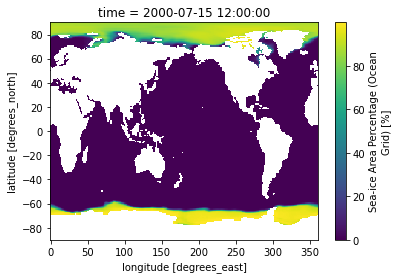

In [37]:
nc = xarray.open_dataset("Data/outfile_sethalo.nc")
plotting = nc.sel(time = "2000-07")
plotting[variable].plot()
nc

Text(0, 0.5, 'lat')

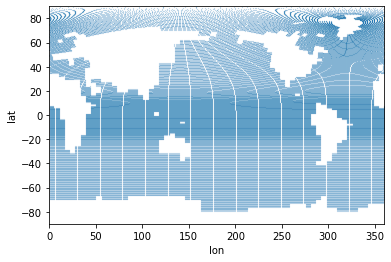

In [40]:
# Visualising original grid
plt.scatter(nc["lon"], nc["lat"], s = 0.01)
plt.ylim([-90, 90])
plt.xlim([0, 360])
plt.xlabel("lon")
plt.ylabel("lat")

Trying regridding with xesmf but didn't work

In [ ]:
ds_out = xe.util.grid_global(1,1)
ds_out

<xarray.Dataset>
Dimensions:  (y: 180, x: 360, y_b: 181, x_b: 361)
Coordinates:
    lon      (y, x) float64 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
    lat      (y, x) float64 -89.5 -89.5 -89.5 -89.5 ... 89.5 89.5 89.5 89.5
    lon_b    (y_b, x_b) int64 -180 -179 -178 -177 -176 ... 176 177 178 179 180
    lat_b    (y_b, x_b) int64 -90 -90 -90 -90 -90 -90 -90 ... 90 90 90 90 90 90
Dimensions without coordinates: y, x, y_b, x_b
Data variables:
    *empty*

In [42]:
regridder = xe.Regridder(nc, ds_out, "patch")
regridder
#nc_out = regridder(var)
#nc_out

ValueError: ESMC_FieldRegridStore failed with rc = 506. Please check the log files (named "*ESMF_LogFile").

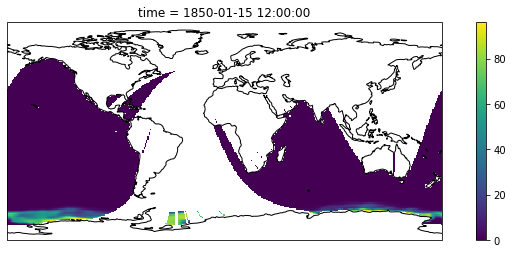

In [33]:
plt.figure(figsize=(12, 4))
ax = plt.axes(projection=cartopy.crs.PlateCarree())
nc_out[0].plot.pcolormesh(ax=ax, x="lon", y="lat")
ax.coastlines()



### Finding year max value 

In [5]:
nc = nct.open_data("Data/outfile_sethalo.nc")

#c.subset(lon = [-180, 180], lat = [-90, 0])

nc.tmax("year")
nc.to_nc("Data/{}_{}_{}_yearmax.nc".format(variable, model, experiment), overwrite = True)

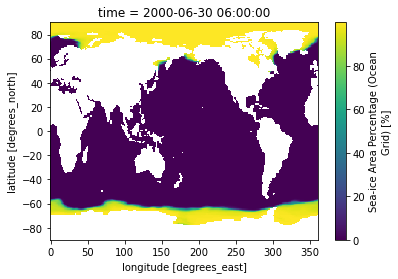

In [110]:
nc = xarray.open_dataset("Data/{}_{}_{}_yearmax.nc".format(variable, model, experiment))
plotting = nc.sel(time = "2000")
plotting[variable].plot()

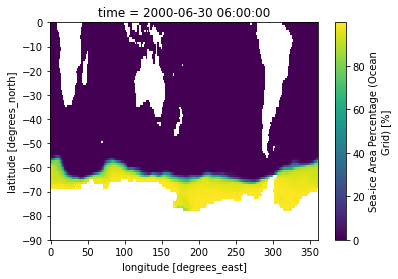

In [111]:
nc_cropped = nc.sel(lat=slice(-90,0))

plotting = nc_cropped.sel(time = "2000")
plotting[variable].plot()

### Find year with highest ice cover (no of cell with >=15% ice conc.)

In [112]:
var = nc_cropped[variable][:]

var.shape

(165, 90, 361)

In [113]:
ice_count = []

In [114]:
for i in range(var.shape[0]):
    var1 = var[i,:,:].values

    var1 = var1.tolist()

    new_var1 = sum(var1, [])

    new_list = []
    for i in (element for element in new_var1 if element is not None):
        new_list.append(i >= 15)
        
    count = sum(new_list)
    ice_count.append(count)

In [115]:
max_value = max(ice_count)
index = ice_count.index(max_value)
index

4

In [116]:
highest = 1850 + index
highest

1854

In [117]:
highest = 1854

### mask out regions with <15% ice conc.

In [12]:
new = nc_cropped.sel(time = "{}".format(highest))

new = new.drop_vars("time_bnds")
new

<xarray.Dataset>
Dimensions:  (time: 1, lon: 361, lat: 90)
Coordinates:
  * time     (time) object 1854-06-30 06:00:00
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0 360.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... -3.5 -2.5 -1.5 -0.5
Data variables:
    siconc   (time, lat, lon) float32 ...
Attributes: (12/44)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Sat Jul 23 18:09:14 2022: cdo -L -z zip_9 -yearma...
    source:                 CESM2 (2017): atmosphere: CAM6 (0.9x1.25 finite v...
    institution:            National Center for Atmospheric Research
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    ...                     ...
    sub_experiment_id:      none
    branch_time_in_parent:  219000.0
    branch_time_in_child:   674885.0
    branch_method:          standard
    further_info_url:       https://furtherinfo.es-doc.org/CMIP6.NCAR.CESM2.h...
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

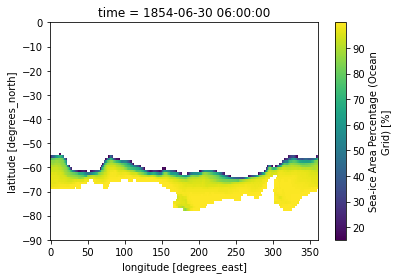

In [13]:
new2 = new.where(new >= 15)
new2[variable].plot()

In [14]:
new3  = new2.assign(ice = lambda x: x.siconc - x.siconc + 1)

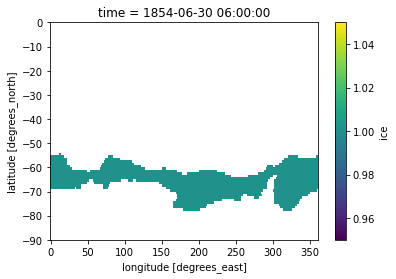

In [15]:
new3['ice'].plot()

In [16]:
new3 = new3.drop_vars("siconc")
new3.to_netcdf(path = "Data/{}_{}_{}_{}_var_only.nc".format(variable, model, experiment, highest), mode = "w", format = "NETCDF4")

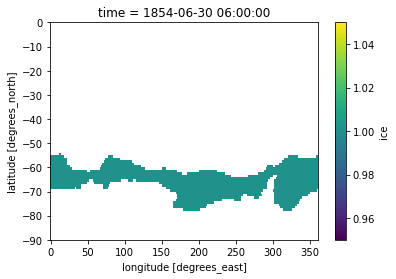

In [18]:
nc = xarray.open_dataset("Data/{}_{}_{}_{}_var_only.nc".format(variable, model, experiment, highest))
nc['ice'].plot()

### Make mask from shapefile

In [59]:
fp = "Shapes/Ice_extent_new.shp"
shape = gpd.read_file(fp, crs = "EPSG:4326")

In [118]:
shape

,DN,geometry
0,1,"POLYGON ((139.000 59.000, 139.000 60.000, 129...."
1,1,"POLYGON ((180.000 57.000, 180.000 58.000, 169...."
2,0,"POLYGON ((0.000 0.000, 0.000 64.000, 8.000 64...."
3,1,"POLYGON ((-40.500 -54.500, -29.500 -54.500, -2..."
4,1,"POLYGON ((320.500 -55.000, 333.500 -55.000, 33..."
5,1,"POLYGON ((11.500 -54.000, 14.500 -54.000, 14.5..."


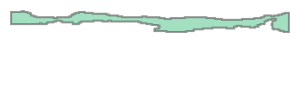

In [119]:
coord1 = shape['geometry'][5].exterior.coords
line1 = shp.LinearRing(coord)
poly1 = shp.Polygon(line)
poly1

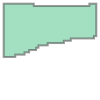

In [120]:
coord2 = shape['geometry'][4].exterior.coords
line2 = shp.LinearRing(coord2)
poly2 = shp.Polygon(line2)
poly2

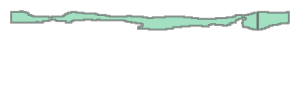

In [63]:
multi_poly = shp.MultiPolygon([poly1, poly2])
multi_poly

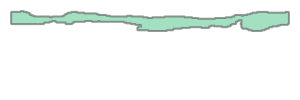

In [121]:
# Expand the region by 1 cells to include open sea
expand = shp.Polygon(multi_poly.buffer(1.0))
expand

In [122]:
ice_new = gpd.GeoSeries(expand)
ice_new

0    POLYGON ((10.500 -54.000, 10.505 -53.902, 10.5...
dtype: geometry

In [19]:
nc = nct.open_data("Data/outfile_sethalo.nc")

nc.tmean("year")

time = nc.years
time = tuple(time)

nc.to_nc("Data/{}_{}_{}_yearmean.nc".format(variable, model, experiment), overwrite = True)

In [123]:
nc = xarray.open_dataset("Data/{}_{}_{}_yearmean.nc".format(variable, model, experiment))
nc = nc.drop_vars("time_bnds")
nc_cropped = nc.sel(lat=slice(-90,0))
nc_cropped

<xarray.Dataset>
Dimensions:  (time: 165, lon: 361, lat: 90)
Coordinates:
  * time     (time) object 1850-06-30 06:00:00 ... 2014-06-30 06:00:00
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0 360.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... -3.5 -2.5 -1.5 -0.5
Data variables:
    siconc   (time, lat, lon) float32 ...
Attributes: (12/44)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Sat Jul 23 18:32:16 2022: cdo -L -z zip_9 -yearme...
    source:                 CESM2 (2017): atmosphere: CAM6 (0.9x1.25 finite v...
    institution:            National Center for Atmospheric Research
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    ...                     ...
    sub_experiment_id:      none
    branch_time_in_parent:  219000.0
    branch_time_in_child:   674885.0
    branch_method:          standard
    further_info_url:       https://furtherinfo.es-doc.org/CMIP6.NCAR.CESM2.h...
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

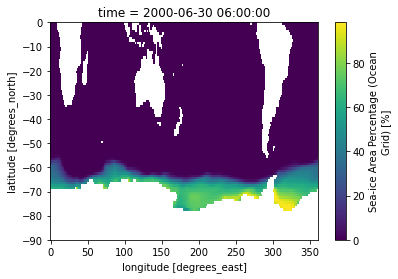

In [124]:
plot = nc_cropped.sel(time = "2000")
plot[variable].plot()

In [125]:
nc_cropped.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
nc_cropped.rio.write_crs("epsg:4326", inplace=True)

<xarray.Dataset>
Dimensions:      (time: 165, lon: 361, lat: 90)
Coordinates:
  * time         (time) object 1850-06-30 06:00:00 ... 2014-06-30 06:00:00
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 357.0 358.0 359.0 360.0
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... -3.5 -2.5 -1.5 -0.5
    spatial_ref  int64 0
Data variables:
    siconc       (time, lat, lon) float32 ...
Attributes: (12/44)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Sat Jul 23 18:32:16 2022: cdo -L -z zip_9 -yearme...
    source:                 CESM2 (2017): atmosphere: CAM6 (0.9x1.25 finite v...
    institution:            National Center for Atmospheric Research
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    ...                     ...
    sub_experiment_id:      none
    branch_time_in_parent:  219000.0
    branch_time_in_child:   674885.0
    branch_method:          standard
    further_info_url:       https://furtherinfo.es-doc.org/CMIP6.NCAR.CESM2.h...
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [126]:
clipped = nc_cropped.rio.clip(ice_new.geometry.values, crs = 4326, drop = False, all_touched = True)

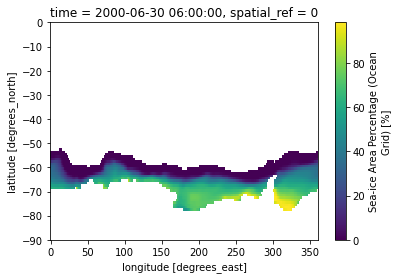

In [127]:
plot = clipped.sel(time = "2000")

plot[variable].plot()

### Yearly spatial mean

In [128]:
nc = clipped.groupby("time").mean(["lat", "lon"])

In [90]:
var = nc.variables[variable][:]
var = list(var.values)

In [91]:
data = pd.DataFrame(index = time)
data[variable] = var
data

,siconc
1850,43.255444
1851,40.645321
1852,41.581287
1853,43.321373
1854,44.142685
...,...
2010,36.554226
2011,36.822487
2012,35.325146
2013,34.881332


<AxesSubplot:>

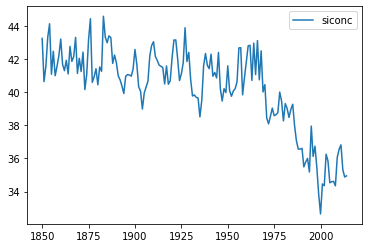

In [92]:
data.plot()